#### 2. SmartSeq\MCF7_SmartS_Unfiltered_Data.txt


We will analyze this second unfiltered data applying techniques and methods already explained in the first analysis.

In [36]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)
import torch as th
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import kstest
from scipy.stats import poisson
from scipy.stats import chisquare
from scipy.stats import nbinom
from scipy.stats import gamma
from scipy.stats import chi2_contingency

In [37]:
#We just create the path and the dataset on Python
df_seq_pathHFilt = '../ai_lab/SmartSeq/HCC1806_SmartS_Filtered_Data.txt'

df_seq_pathHFiltNorm = '../ai_lab/SmartSeq/HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt'

df_seq_pathHUnfilt = '../ai_lab/SmartSeq/HCC1806_SmartS_Unfiltered_Data.txt'

df_seq_pathMFilt = '../ai_lab/SmartSeq/MCF7_SmartS_Filtered_Data.txt'

df_seq_pathMFiltNorm = '../ai_lab/SmartSeq/MCF7_SmartS_Filtered_Normalised_3000_Data_train.txt'

df_seq_pathMUnfilt = '../ai_lab/SmartSeq/MCF7_SmartS_Unfiltered_Data.txt'

df_seq_HFilt = pd.read_csv(df_seq_pathHFilt, delimiter=' ')

df_seq_HFiltNorm = pd.read_csv(df_seq_pathHFiltNorm, delimiter=' ')

df_seq_HUnfilt = pd.read_csv(df_seq_pathHUnfilt, delimiter=' ')

df_seq_MFilt = pd.read_csv(df_seq_pathMFilt, delimiter=' ')

df_seq_MFiltNorm = pd.read_csv(df_seq_pathMFiltNorm, delimiter=' ')

df_seq_MUnfilt = pd.read_csv(df_seq_pathMUnfilt, delimiter=' ')

In [38]:
df_metaM_path = '../ai_lab/SmartSeq/MCF7_SmartS_MetaData.tsv'
df_metaM = pd.read_csv(df_metaM_path, delimiter='\t')

In [39]:
# df_metaM = df_metaM.drop(columns=['Filename'])
df_metaM.head()

,Filename,Cell Line,Lane,Pos,Condition,Hours,Cell name,PreprocessingTag,ProcessingComments
0,output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoo...,MCF7,output.STAR.1,A10,Hypo,72,S28,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
1,output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoo...,MCF7,output.STAR.1,A11,Hypo,72,S29,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
2,output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoo...,MCF7,output.STAR.1,A12,Hypo,72,S30,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
3,output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord...,MCF7,output.STAR.1,A1,Norm,72,S1,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
4,output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord...,MCF7,output.STAR.1,A2,Norm,72,S2,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"


Condition
Norm    192
Hypo    191
Name: count, dtype: int64


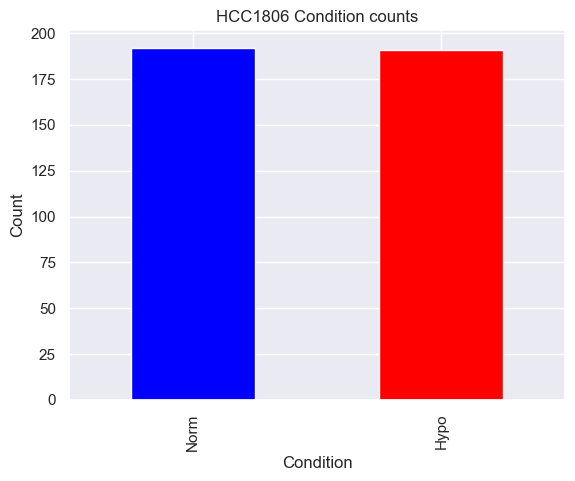

In [51]:
# before starting the analysis of seqdata we check the counts for Norm or Hypo as we did for the other dataset
# in the column 'Condition' for both the datasets count the number of Norm and Hypo
counts = df_metaM['Condition'].value_counts()
# Histogram of the counts
print(counts)
# Plot the histogram with two columns for each condition
counts.plot(kind='bar', color=['blue', 'red'])
plt.title('HCC1806 Condition counts')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

In [40]:
# Focus now on MCF7 Unfiltered
print("Dataframe dimension:", df_seq_MUnfilt.shape)
print("First Column:", df_seq_MUnfilt.iloc[:,0])
print("Columns list:", list(df_seq_MUnfilt.columns))

Dataframe dimension: (22934, 383)
First Column: WASH7P         0
MIR6859-1      0
WASH9P         1
OR4F29         0
MTND1P23       0
            ... 
MT-TE          4
MT-CYB       270
MT-TT          0
MT-TP          5
MAFIP          8
Name: output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam, Length: 22934, dtype: int64
Columns list: ['output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam', 'output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam', 'output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam', 'output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam', 'output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam', 'output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam', 'output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam', 'output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam', 'output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam', 'output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord.out.bam', 'output.STAR.1_A8_Hypo_S26_Aligned.sortedByCoord.out.bam', 'output.STAR

In [41]:
# Take the transpose of the dataframe
print("Dataframe dimension before transpose:", df_seq_MUnfilt.shape)
df_seq_MUnfilt = df_seq_MUnfilt.T
print("Dataframe dimension after transpose:", df_seq_MUnfilt.shape)
df_seq_MUnfilt.head(5)

Dataframe dimension before transpose: (22934, 383)
Dataframe dimension after transpose: (383, 22934)


,WASH7P,MIR6859-1,WASH9P,OR4F29,MTND1P23,MTND2P28,MTCO1P12,MTCO2P12,MTATP8P1,MTATP6P1,...,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP,MAFIP
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam,0,0,1,0,0,2,2,0,0,29,...,0,0,0,505,147,4,270,0,5,8
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,1,0,0,0
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam,0,0,0,0,0,1,1,1,0,12,...,0,0,0,1,0,0,76,0,0,0
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam,0,0,0,0,0,0,0,0,0,7,...,1,0,0,44,8,0,66,0,1,0
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam,0,0,0,0,0,0,0,0,0,68,...,0,0,0,237,31,3,727,0,0,0


In [42]:
# Now we look at evetual missing values in the dataframe
print("Missing values in the dataframe by columns:", df_seq_HUnfilt.isnull().sum())
print("Missing values in the whole dataframe:", df_seq_HUnfilt.isna().sum().sum())

Missing values in the dataframe by columns: output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam    0
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam     0
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam       0
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam      0
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam        0
                                                                       ..
output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam    0
output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam    0
output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam      0
output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam     0
output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam     0
Length: 243, dtype: int64
Missing values in the whole dataframe: 0


In [43]:
# Summary statistics of the dataframe
df_seq_MUnfilt.describe()

,WASH7P,MIR6859-1,WASH9P,OR4F29,MTND1P23,MTND2P28,MTCO1P12,MTCO2P12,MTATP8P1,MTATP6P1,...,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP,MAFIP
count,383.000000,383.000000,383.000000,383.00000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,...,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.00000,383.000000,383.000000,383.000000
mean,0.133159,0.026110,1.344648,0.05483,0.049608,6.261097,4.681462,0.524804,0.073107,222.054830,...,1.060052,0.443864,3.146214,1016.477807,204.600522,5.049608,2374.97389,2.083551,5.626632,1.749347
std,0.618664,0.249286,2.244543,0.31477,0.229143,7.565749,6.232649,0.980857,0.298131,262.616874,...,1.990566,1.090827,4.265352,1009.444811,220.781927,6.644302,2920.39000,3.372714,7.511180,3.895204
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,...,0.000000,0.000000,0.000000,172.000000,30.500000,0.000000,216.50000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.00000,0.000000,3.000000,2.000000,0.000000,0.000000,98.000000,...,0.000000,0.000000,1.000000,837.000000,152.000000,3.000000,785.00000,0.000000,3.000000,0.000000
75%,0.000000,0.000000,2.000000,0.00000,0.000000,10.000000,7.000000,1.000000,0.000000,370.500000,...,1.000000,0.000000,5.000000,1549.000000,294.000000,7.000000,4059.00000,3.000000,8.000000,2.000000
max,9.000000,4.000000,20.000000,3.00000,2.000000,45.000000,36.000000,6.000000,2.000000,1662.000000,...,15.000000,8.000000,22.000000,8115.000000,2002.000000,46.000000,16026.00000,22.000000,56.000000,32.000000


In [44]:
# We proceed adding the target column (class) to the dataframe as we did with the other one
print(df_metaM.columns)
df_metaM.set_index('Filename', inplace=True)
# Merge the two dataframes with key 'Filename'
merged_df = pd.merge(df_seq_MUnfilt, df_metaM['Condition'], left_index=True, right_index=True)
print(merged_df.columns)

Index(['Filename', 'Cell Line', 'Lane', 'Pos', 'Condition', 'Hours',
       'Cell name', 'PreprocessingTag', 'ProcessingComments'],
      dtype='object')
Index(['WASH7P', 'MIR6859-1', 'WASH9P', 'OR4F29', 'MTND1P23', 'MTND2P28',
       'MTCO1P12', 'MTCO2P12', 'MTATP8P1', 'MTATP6P1',
       ...
       'MT-TS2', 'MT-TL2', 'MT-ND5', 'MT-ND6', 'MT-TE', 'MT-CYB', 'MT-TT',
       'MT-TP', 'MAFIP', 'Condition'],
      dtype='object', length=22935)


In [49]:
# Note that once again we will consider 1 = Hypo, 0 = Norm
# and transform the categorical variable 'Condition' to numerical
dummy_variables = pd.get_dummies(merged_df['Condition'], prefix='category').astype('int')
merged = pd.concat([merged_df, dummy_variables], axis=1)
merged.drop(columns=['category_Hypo', 'Condition'], inplace=True)
merged.rename(columns={'category_Norm': 'Target'}, inplace=True)


In [50]:
merged.head()

,WASH7P,MIR6859-1,WASH9P,OR4F29,MTND1P23,MTND2P28,MTCO1P12,MTCO2P12,MTATP8P1,MTATP6P1,...,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP,MAFIP,Target
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam,0,0,1,0,0,2,2,0,0,29,...,0,0,505,147,4,270,0,5,8,0
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam,0,0,0,0,0,1,1,1,0,12,...,0,0,1,0,0,76,0,0,0,0
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam,0,0,0,0,0,0,0,0,0,7,...,0,0,44,8,0,66,0,1,0,1
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam,0,0,0,0,0,0,0,0,0,68,...,0,0,237,31,3,727,0,0,0,1


We are now ready to replicate the work done in the first analysis, but this time with this dataset